## Task1 : Data Cleaning & Preprocessing

### 1. Importing the dataset and exploring basic info

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [42]:
df=pd.read_csv("/home/apiiit123/task1/Titanic-Dataset.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [43]:
# Top 5 rows in dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [44]:
#Dataset shape
print("Shape:",df.shape)

Shape: (891, 12)


In [45]:
#check datatypes
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [46]:
#Basic statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [47]:
# Check data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [48]:
# Count missing values in each column
print(df.isnull().sum())
# Drop the 'Cabin' column from the DataFrame
df = df.drop('Cabin', axis=1)
print(df)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  2

### 2. Handle missing values using mean/median/imputation

In [49]:
# We use mean() when the data is normally distributed (symmetrical) or if You don’t have extreme values (outliers).
# Get all numeric columns in the dataset
df['Age'] = df['Age'].fillna(df['Age'].mean())
print(df['Age'].isnull().sum())

0


In [51]:
# we use ffill or bfill because these are not numeric values

df['Embarked'] = df['Embarked'].fillna(method='ffill')
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipykernel_35521/493068928.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'] = df['Embarked'].fillna(method='ffill')


### 3. Convert categorical features into numerical using encoding

In [52]:
# we have 2 types of encoding
    #label encoding--when categories have clear order(0,1,2) and one-hot encoding--when categories have no order(male,female)
# One-hot encode 'Sex' and 'Embarked' columns
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [53]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp  \
0                              Braund, Mr. Owen Harris  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

### 4. Normalize / Standardize the numerical features

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df.head())

   PassengerId  Survived    Pclass  \
0    -1.730108 -0.789272  0.827377   
1    -1.726220  1.266990 -1.566107   
2    -1.722332  1.266990  0.827377   
3    -1.718444  1.266990 -1.566107   
4    -1.714556 -0.789272  0.827377   

                                                Name       Age     SibSp  \
0                            Braund, Mr. Owen Harris -0.592481  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.638789  0.432793   
2                             Heikkinen, Miss. Laina -0.284663 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926  0.432793   
4                           Allen, Mr. William Henry  0.407926 -0.474545   

      Parch            Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0 -0.473674         A/5 21171 -0.502445      True       False        True  
1 -0.473674          PC 17599  0.786845     False       False       False  
2 -0.473674  STON/O2. 3101282 -0.488854     False       False        True  
3 -0.47367

### 5. Visualize outliers using boxplots and remove them

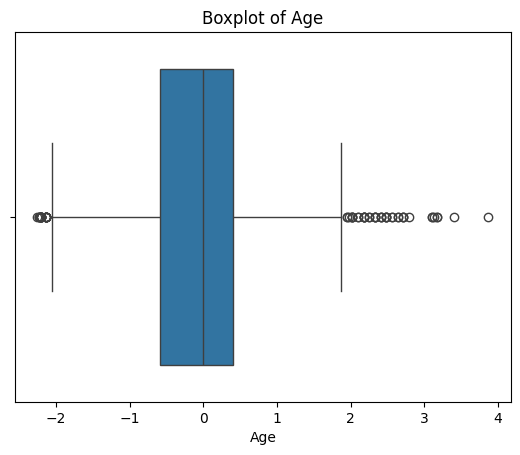

In [55]:
# Boxplot of Age
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

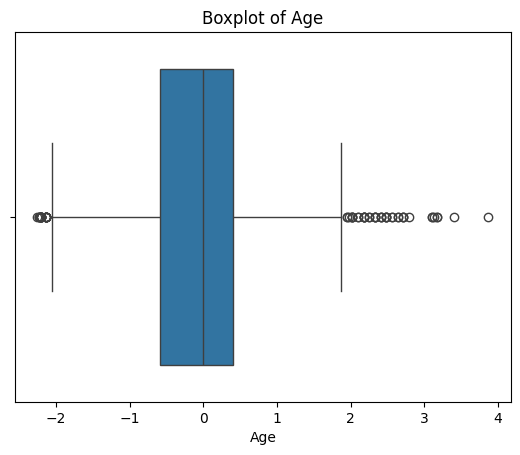

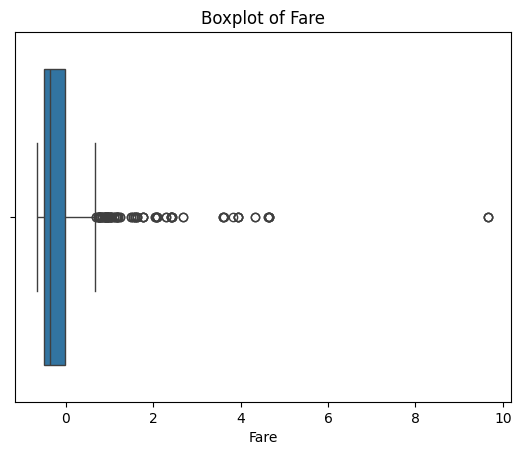

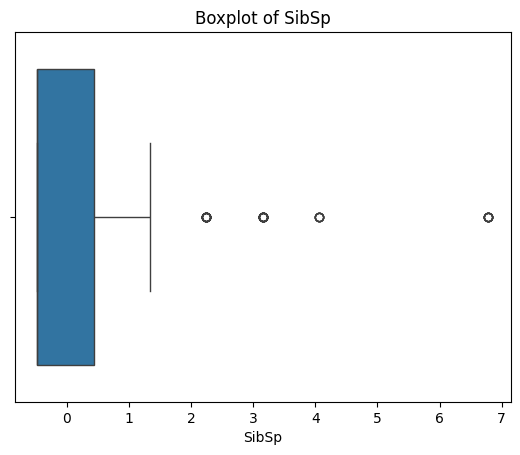

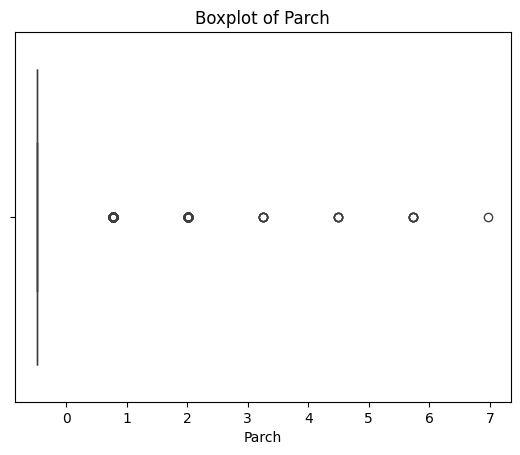

In [56]:
# Visualization of multiple colums at a single time
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#### removing outliers 

In [57]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Apply to your numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df_cleaned = remove_outliers(df, numeric_cols)


In [58]:
print("Original shape:", df.shape)
print("After removing outliers:", df_cleaned.shape)

Original shape: (891, 12)
After removing outliers: (577, 12)


In [60]:
# save the dataset
df.to_csv("/home/apiiit123/task1/cleaned_titanic.csv", index=False)